 
# prediction using Unsupervised Machine Learning
## predict the optimum number of clusters for the iris data set using Unsupervised machine learning

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
# Load the iris dataset
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

### Find outliers

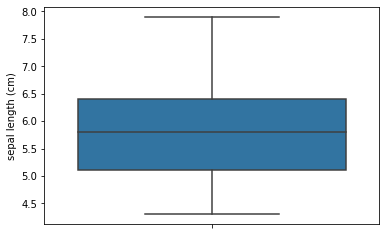

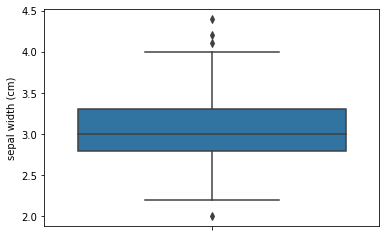

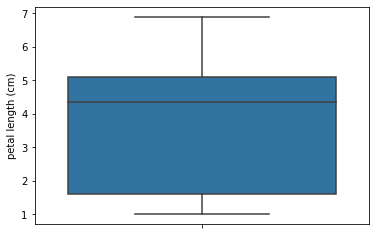

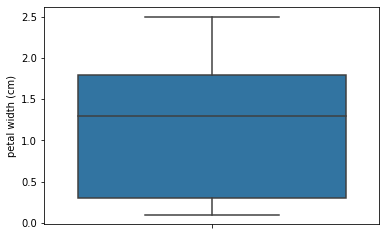

In [4]:
col = df.columns 
for c in col :
  sns.boxplot (y=df[c]) 
  plt.show()

#### remove outlier from sepal width

In [5]:
min_thresold = df['sepal width (cm)'].quantile(0.25)
max_thresold = df['sepal width (cm)'].quantile(0.75)
iqr = max_thresold - min_thresold

In [6]:
#df[(df['sepal width (cm)']<max_thresold) & (df['sepal width (cm)']>min_thresold)]

df_new = df[(df['sepal width (cm)'] >= min_thresold-1.5*iqr) & (df['sepal width (cm)'] <= max_thresold+1.5*iqr)]
df_new.shape 

(146, 4)

### so 4 rows has been removed 

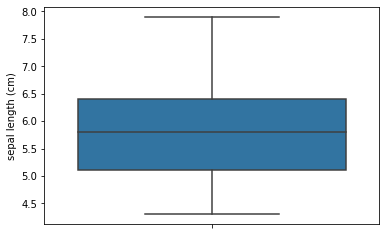

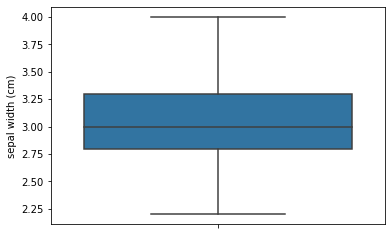

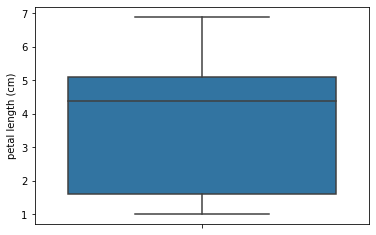

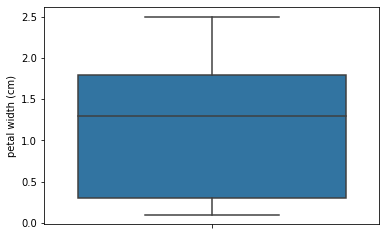

In [7]:
col = df_new.columns 
for c in col :
  sns.boxplot (y=df_new[c]) 
  plt.show()

In [8]:
x = df_new.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
cluster_errors = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cluster_errors.append(kmeans.inertia_)


### Ploting elbow curve

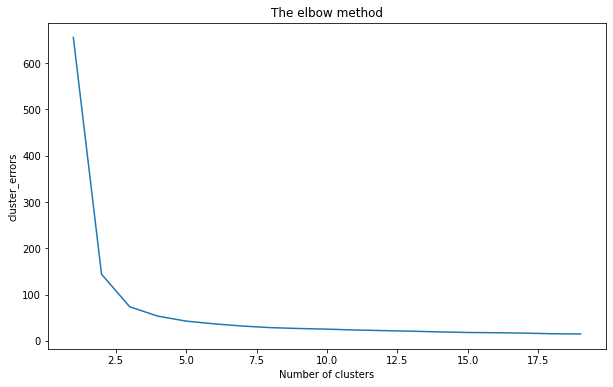

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), cluster_errors)

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cluster_errors') 
plt.show()

## so choosing 3 clusters 
## Applying k means to the dataset / Creating the k means classifier.

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

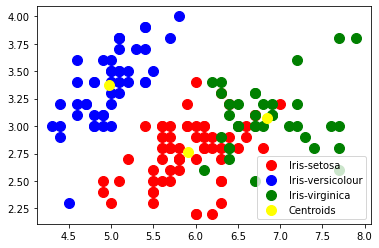

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()